<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-notebook-calculates-the-concentration-of-Cu-and-Ba-during-mantle-melting-in-the-presence-of-sulfide." data-toc-modified-id="This-notebook-calculates-the-concentration-of-Cu-and-Ba-during-mantle-melting-in-the-presence-of-sulfide.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This notebook calculates the concentration of Cu and Ba during mantle melting in the presence of sulfide.</a></span><ul class="toc-item"><li><span><a href="#Loading-libraries" data-toc-modified-id="Loading-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading libraries</a></span></li></ul></li><li><span><a href="#Loading-Plotting-Details" data-toc-modified-id="Loading-Plotting-Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Plotting Details</a></span><ul class="toc-item"><li><span><a href="#Setting-up-the-melt-intervals" data-toc-modified-id="Setting-up-the-melt-intervals-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setting up the melt intervals</a></span></li></ul></li><li><span><a href="#Setting-up-the-mineralogy-of-system" data-toc-modified-id="Setting-up-the-mineralogy-of-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting up the mineralogy of system</a></span></li><li><span><a href="#Setting-up-the-system-for-S" data-toc-modified-id="Setting-up-the-system-for-S-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Setting up the system for S</a></span></li><li><span><a href="#Setting-the-Cu-and-Ba-and-Cu-contents-of-the-mantle,-and-Sulf-Sil-Kds" data-toc-modified-id="Setting-the-Cu-and-Ba-and-Cu-contents-of-the-mantle,-and-Sulf-Sil-Kds-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Setting the Cu and Ba and Cu contents of the mantle, and Sulf-Sil Kds</a></span><ul class="toc-item"><li><span><a href="#The-following-equations-are-evaluated-in-a-for-loop-for-the-number-of-steps-defined-in-M:" data-toc-modified-id="The-following-equations-are-evaluated-in-a-for-loop-for-the-number-of-steps-defined-in-M:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The following equations are evaluated in a for loop for the number of steps defined in M:</a></span></li></ul></li><li><span><a href="#Cu-Concentrations" data-toc-modified-id="Cu-Concentrations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cu Concentrations</a></span><ul class="toc-item"><li><span><a href="#This-sets-the-size-of-variables-to-be-filled-in-by-the-for-loop:" data-toc-modified-id="This-sets-the-size-of-variables-to-be-filled-in-by-the-for-loop:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>This sets the size of variables to be filled in by the for loop:</a></span></li><li><span><a href="#For-loop-for-Cu" data-toc-modified-id="For-loop-for-Cu-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>For loop for Cu</a></span></li><li><span><a href="#Calculating-the-point-at-which-sulfides-are-exhausted-in-each-model" data-toc-modified-id="Calculating-the-point-at-which-sulfides-are-exhausted-in-each-model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Calculating the point at which sulfides are exhausted in each model</a></span></li></ul></li><li><span><a href="#Ba-concentrations" data-toc-modified-id="Ba-concentrations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ba concentrations</a></span><ul class="toc-item"><li><span><a href="#Creating-new-variables-of-correct-size" data-toc-modified-id="Creating-new-variables-of-correct-size-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating new variables of correct size</a></span></li><li><span><a href="#For-loop-for-Ba" data-toc-modified-id="For-loop-for-Ba-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>For loop for Ba</a></span></li></ul></li><li><span><a href="#Plot-for-Ba-vs.-F" data-toc-modified-id="Plot-for-Ba-vs.-F-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot for Ba vs. F</a></span></li><li><span><a href="#Plot-for-Cu-and-Ba-vs.-F" data-toc-modified-id="Plot-for-Cu-and-Ba-vs.-F-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot for Cu and Ba vs. F</a></span></li><li><span><a href="#Plot-of-Ba-vs-Cu" data-toc-modified-id="Plot-of-Ba-vs-Cu-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Plot of Ba vs Cu</a></span></li></ul></div>

# This notebook calculates the concentration of Cu and Ba during mantle melting in the presence of sulfide.
If you use, or adapt this code, please cite Wieser et al., (2020), GCA, https://doi.org/10.1016/j.gca2020.05.018

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Loading Plotting Details

In [2]:
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster", rc= {'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1

## Setting up the melt intervals

In [3]:
# Number of steps in the iterative loop. Bigger N, smoother lines, but code takes a longer to run. 
#In particular, the more steps, the less issues you have for the point of sulfide out, as the code
#identifies the first step without sulfide, which converges to the last step with sulfide for small delta M
N=3001
M=np.linspace(1, 0.7, N) # Mass of peridotite to calculate over. E.g., from 0% to 30% melt here. 
F=1-M # After Lee et al., 2012 we use M in the melting equations (mass of the peridotite residue), instead of F

# Setting up the mineralogy of system
In this code, the non-modal melting behaviour of silicates is ignored, as this requires accurate estimates of changing mineral modes at high pressures. Fixing the value of K$_{D, Sil}$ has a negligable effect.

In [4]:
# From Mckenzie and O'Nions, 1991, After Gibson and Geist, 2010
XGt=0.115 #Modal Proportion of Garnet
XCpx=0.076 # Modal proportion of Cpx
XOpx=0.211 #Modal proportion of Opx
XOl=0.598 #Modal proportion of olivine

# These partition coefficients are from Gibson and Geist, 2010
Kd_Gt_Ba=0.00007
Kd_Cpx_Ba=0.0004
Kd_Opx_Ba=0.000006
Kd_Ol_Ba=0.000005
KdBaSil=Kd_Gt_Ba*XGt + Kd_Cpx_Ba*XCpx + Kd_Opx_Ba*XOpx + Kd_Ol_Ba*XOl # In this study, this is 4.27*10^-5

# These partition coefficients are from Liu et al. 2014
Kd_Gt_Cu=0.03
Kd_Cpx_Cu=0.06
Kd_Opx_Cu=0.04
Kd_Ol_Cu=0.05
KdCuSil=Kd_Gt_Cu*XGt + Kd_Cpx_Cu*XCpx + Kd_Opx_Cu*XOpx + Kd_Ol_Cu*XOl # In this study, this is 0.04635


# Setting up the system for S



In [5]:
# This evaluates for S(initial)=300, 200, 100, 50, 0 ppm. Can add more or less to evaluate over. 
SArray=np.array([300, 200, 100, 50, 0]) 

#Enter the S content of mantle sulfides in ppm.
S_Sulf = 33*(10**4) 

# Set this as the S content of the melt. Here it is constant throughout the melting interval, but this could be changed.
S_Melt_SCSS_2=np.repeat(1600, len(M)) 

# Define the proportion of S6+ species, causes an increase in the total in the melt (after Jugo et al., 2010)
Prop_S6 = 0 
S_Melt = S_Melt_SCSS_2/(1+Prop_S6) 

#  Setting the Cu and Ba and Cu contents of the mantle, and Sulf-Sil Kds

In [6]:
# This is the Cu content of the mantle. Palme and O'Neill give 20 ppm, McDonough and Sun, 1995 give 30 ppm
Cu_Per= 20 

# Kd of Cu in sulfide
KdCuSulf=800 

 # This is the Ba content of the mantle. Palme and O'Neill give 6.85 ppm, McDonough and Sun, 1995 give 6.6 ppm
Ba_Per= 6.85

# Kd of Ba in sulfide
KdBaSulf=0 

## The following equations are evaluated in a for loop for the number of steps defined in M:



 The change in the mass of the mantle residue during step i was calculated from M at the previous step and M at the end of this melting step:

 
 $$ \Delta M^i = M^{i-1} - M^{i} \, \, \,  \, (1) $$
 
 
 
The proportion of melt produced at step i relative to the mass of the system at the start of that melting step was calculated from:
$$X_{F,Step}^{i} = \frac{ \Delta M^{i} } { M^{i-1}}    \, \, \,  \, (2) $$ 

The amount of S left in the residual mantle after each melting step was calculated from:
$$ [S]_{Residue}^{i} = \frac{ [S]_{Residue}^{i-1} - [S]_{Melt}^{i} \times X_{F, Step}^{i} } {1- X_{F, Step}^{i}} \, \, \,  \, (3) $$


Once sulfide was exhausted,  S$_{Residue}$ was set to 0 to avoid negative numbers. The amount of S in the melt after this point will depend on the amount of S hosted within silicate minerals (which is poorly constrained, so ignored in this simple model). 

The proportion of sulfide was calculated from the S content of the residual mantle and the amount of S in sulfides in ppm:
$$ X_{Sulf}^i = \frac{S_{Residue}^i} {S_{Sulf}} \, \, \,  \, (4) $$

The change in the amount of sulfide during a given melting step was calculated from the change in the amount of S in the mantle during that step:
$$ \Delta X_{Sulf}^{i} =\frac{ S_{Residue}^{i-1} - S_{Residue}^{i}  }{S_{Sulf}} \, \, \,  \, (5) $$

By mass balance (see Equations 10 and 11), the change in the amount of solid silicate during a given melting step is equal to the amount of melt produced in that step minus the change in the amount of sulfide: 
$$ \Delta X_{Sil}^{i} =\Delta M^{i} - \Delta X_{Sulf}^{i} \, \, \,  \, (6) $$



The concentration of element [A] in instantaneous melts created at step i was approximated from the non-modal batch melting equation and recalling that the computational step in melt fraction is small:

$$ [A]_{Inst. \, melt}^{i} = \frac{[A]_{Residue}^{i-1} }{K_{D, Bulk}^{i-1}+(1-P^{i})\times X_{F, Step}^{i} }  \, \, \,  \, (7) $$


Where [A]$_{Residue}^{i-1}$ is the concentration of element A in the mantle residue at the end of the previous step, P$^{i}$ is the bulk distribution coefficient weighted by the proportion that each phase contributes to the melt. K$_{D}^{i-1}$ is the bulk distribution coefficient of the solid residue at the end of the previous step, calculated from:  

$$ K_{D, Bulk}^{i-1}= K_{D, Sil} \times (1-X_{sulf}^{i-1}) + K_{D, Sulf} \times X_{Sulf}^{i-1} \, \, \,  \, (8) $$

Incorporating non-modal melting for silicates (rather than a constant value of K$_{D, Sil}$) requires accurate estimates of changing mineral modes at high pressures (problematic at >3 GPa, Ghiorso et al, 2002). Fixing the value of K$_{D, Sil}$ has negligible effects on modelled Cu concentrations, as K$_{D, \, Sulf}$ is 4-5 orders of magnitude higher than K$_{D, \, Sil}$, and silicate phases have similarly low partition coefficients

The fraction of silicate and sulfide phases in the melting assemblage needed to calculate P values were calculated by dividing  $\Delta$X$_{Sulf}^{i}$ and  $\Delta$X$_{Sil}^{i}$ by the proportion of melt produced in this step ($\Delta$M$^i$). These fractions were then multipled by their respective partition coefficients:

$$P^{i} =K_{D, \, Sil} \times \frac{  \Delta X_{Sil}^{i} }{ \Delta M^{i} } + K_{D, \, Sulf} \times \frac{\Delta X_{Sulf}^{i} }{ \Delta M^{i} } \, \, \,  \, (9) $$



Mass balance equations were written for the concentration of element A in the peridotite residue at the end of the previous melting step, the end of the current melting step i, and the composition of the instantaneous melt produced in this step:

$$ [A]_{Residue}^{i-1} = [A]_{Residue}^i \times (1- X_{F, Step}^{i}) + [A]_{Inst. \,melt}^{i} \times X_{F, Step}^{i}  \, \, \,  \, (10)$$

Re-arranging for [A]$_{Residue}^i$ gives the form shown above for [S]$_{Residue}^{i}$:

$$[A]_{Residue}^{i} = \frac{ [A]_{Residue}^{i-1} - [A]_{Inst. \, melt}^{i} \times X_{F, Step}^{i} } {1- X_{F, Step}^{i} } \, \, \,  \, (11)$$

Similarly, aggregated melt compositions were calculated from the instantaneous melts using mass balance between the aggregated melt at the end of the previous step, and the instanteous melt produced in this step:
$$ [A]_{Agg. \, melt}^{i} = [A]_{Agg. \, melt}^{i-1} \times (1-X_{F, Start}^{i}) + [A]_{Inst. \, melt}^{i} \times X_{F, Start}^{i} \, \, \,  \, (12) $$

Note that instead of using the proportion of melt produced in a given step (X$_{F, Step}^{i}$), this equation uses the proportion of melt produced in this step compared with the total amount of melt produced from the very start of the model:

$$ X_{F, Start}^{i}=  \frac{\Delta M^i}{M^1-M^i} \, \, \,  \, (13) $$
Where M$^1$=1.


# Cu Concentrations

## This sets the size of variables to be filled in by the for loop:

In [7]:
#These ones have only 1 dimension for different M steps, as they do not vary with different mantle S contents
DeltaM= np.empty(len(M), dtype=float) 
X_FStep=np.empty(len(M), dtype=float)  
X_FStart=np.empty( len(M), dtype=float)

# These ones have 2 dimensions, one for different M steps, one for different mantle S contents
S_residue= np.empty( (len(SArray), len(M)), dtype=float) 
XSulf= np.empty( (len(SArray), len(M)), dtype=float) 
Cu_residue= np.empty( (len(SArray), len(M)), dtype=float) 
Cu_Melt_Inst= np.empty( (len(SArray), len(M)), dtype=float) 
Cu_Melt_Agg= np.empty( (len(SArray), len(M)), dtype=float) 
DeltaXSulf=np.empty( (len(SArray), len(M)), dtype=float) 
DeltaXSil=np.empty( (len(SArray), len(M)), dtype=float)
P=np.empty( (len(SArray), len(M)), dtype=float)
Kd=np.empty( (len(SArray), len(M)), dtype=float)
DeltaXMeltTot=np.empty( (len(SArray), len(M)), dtype=float)

## For loop for Cu

In [8]:
for i in range(0, len(M)):
    if i==0: # Setting up the system before any melting takes place
        S_residue[:,i]=SArray # Initial S contents of mantle before any melting set at those defined in SArray
        XSulf[:,i]=S_residue[:,i]/S_Sulf # Proportion (by mass) of sulfides in the source
        Cu_residue[:,i]=Cu_Per # Initial Cu content of peridotite mantle
        Cu_Melt_Inst[:,i]=0 # No melting, so no Cu in the instantaneous melt
        Cu_Melt_Agg[:,i]=0 # No melting, so no Cu in the aggregated melt
        DeltaM[i]=0 # No change in the amount of peridotite residue
        DeltaXSulf[:,i]=0 # No change in the proportion of sulfide
        DeltaXSil[:,i]=0  # No change in the proportion of silicate
        P[:,i]=0          # No melting, so no preferential melting of different minerals 
        Kd[:,i]=KdCuSil* (1- XSulf[:,i]) + KdCuSulf* (XSulf[:,i]) # Bulk Kd for the mantle before any melting occurs
        X_FStep[i]=0 # No melt, so no melt proportion made in this step
        X_FStart[i]=0 # as above
        DeltaXMeltTot[:,i]=0 # as above
    else:  
        DeltaM[i]=M[i-1]-M[i]  # Equation 1
        X_FStep[i]= DeltaM[i]/M[i-1] # Equation 2
        S_residue[:,i] = (S_residue[:,i-1] -S_Melt[i]* X_FStep[i])/(1-X_FStep[i]) # Equation 3
        S_residue[S_residue<0]=0 # To avoid negative numbers. 
        XSulf[:,i] = S_residue[:,i]/S_Sulf # Equation 4
    
        DeltaXSulf[:,i]=(S_residue[:,i-1]-S_residue[:,i])/S_Sulf # Equation 5
        DeltaXSil[:,i]=DeltaM[i]- DeltaXSulf[:,i] # Equation 6
        
        Kd[:,i]=KdCuSil* (1- XSulf[:,i]) + KdCuSulf* (XSulf[:,i]) # Equation 8
        P[:,i] = KdCuSil* ( DeltaXSil[:,i]/DeltaM[i] ) + (KdCuSulf * (DeltaXSulf[:,i]/DeltaM[i])) # Equation 9
        
        Cu_Melt_Inst[:,i]=Cu_residue[:,i-1]/ ( Kd[:,i-1] + (1-P[:,i])*X_FStep[i] ) # Equation 7
        Cu_residue[:,i]=( Cu_residue[:,i-1] - Cu_Melt_Inst[:,i] * X_FStep[i] )/( 1- X_FStep[i] ) # Equation 10
        X_FStart[i]=DeltaM[i]/(1-M[i]) #Equation 13
        Cu_Melt_Agg[:,i]=(Cu_Melt_Agg[:,i-1]*(1-X_FStart[i])) + (Cu_Melt_Inst[:,i]* X_FStart[i]) # Equation 12

## Calculating the point at which sulfides are exhausted in each model

In [9]:
SulfOut_0=np.take(np.where(S_residue[0,:]==0), 0)
SulfOut_1=np.take(np.where(S_residue[1,:]==0), 0)
SulfOut_2=np.take(np.where(S_residue[2,:]==0), 0)
SulfOut_3=np.take(np.where(S_residue[3,:]==0), 0)
SulfOut_4=np.take(np.where(S_residue[4,:]==0), 0)

# Ba concentrations

## Creating new variables of correct size

In [10]:
Ba_residue= np.empty( (len(SArray), len(M)), dtype=float) 
Ba_Melt_Inst= np.empty( (len(SArray), len(M)), dtype=float) 
Ba_Melt_Agg= np.empty( (len(SArray), len(M)), dtype=float) 

## For loop for Ba

In [11]:
for i in range(0, len(M)):
    if i==0: # Setting up the system before any melting takes place
        S_residue[:,i]=SArray # Initial S contents of mantle before any melting set at those defined in SArray
        XSulf[:,i]=S_residue[:,i]/S_Sulf # Proportion (by mass) of sulfides in the source
        Ba_residue[:,i]=Ba_Per # Initial Ba content of peridotite mantle
        Ba_Melt_Inst[:,i]=0 # No melting, so no Ba in the instantaneous melt
        Ba_Melt_Agg[:,i]=0 # No melting, so no Ba in the aggregated melt
        DeltaM[i]=0 # No change in the amount of peridotite residue
        DeltaXSulf[:,i]=0 # No change in the proportion of sulfide
        DeltaXSil[:,i]=0  # No change in the proportion of silicate
        P[:,i]=0          # No melting, so no preferential melting of different minerals 
        Kd[:,i]=KdBaSil* (1- XSulf[:,i]) + KdBaSulf* (XSulf[:,i]) # Bulk Kd for the mantle before any melting ocBars
        X_FStep[i]=0 # No melt, so no melt proportion made in this step
        X_FStart[i]=0 # as above
        DeltaXMeltTot[:,i]=0 # as above
    else:  
        DeltaM[i]=M[i-1]-M[i] 
        X_FStep[i]= DeltaM[i]/M[i-1]
        S_residue[:,i] = (S_residue[:,i-1] -S_Melt[i]* X_FStep[i])/(1-X_FStep[i])
        S_residue[S_residue<0]=0
        XSulf[:,i] = S_residue[:,i]/S_Sulf
    
        DeltaXSulf[:,i]=(S_residue[:,i-1]-S_residue[:,i])/S_Sulf
        DeltaXSil[:,i]=DeltaM[i]- DeltaXSulf[:,i]
        
        Kd[:,i]=KdBaSil* (1- XSulf[:,i]) + KdBaSulf* (XSulf[:,i])
        P[:,i] = KdBaSil* ( DeltaXSil[:,i]/DeltaM[i] ) + KdBaSulf * (DeltaXSulf[:,i]/DeltaM[i])
        
        Ba_Melt_Inst[:,i]=Ba_residue[:,i-1]/ ( Kd[:,i-1] + (1-P[:,i])*X_FStep[i] )
        Ba_residue[:,i]=( Ba_residue[:,i-1] - Ba_Melt_Inst[:,i] * X_FStep[i] )/( 1- X_FStep[i] )
        X_FStart[i]=DeltaM[i]/(1-M[i])
        Ba_Melt_Agg[:,i]=Ba_Melt_Agg[:,i-1]*(1-X_FStart[i]) + Ba_Melt_Inst[:,i]* X_FStart[i]

# Plot for Ba vs. F

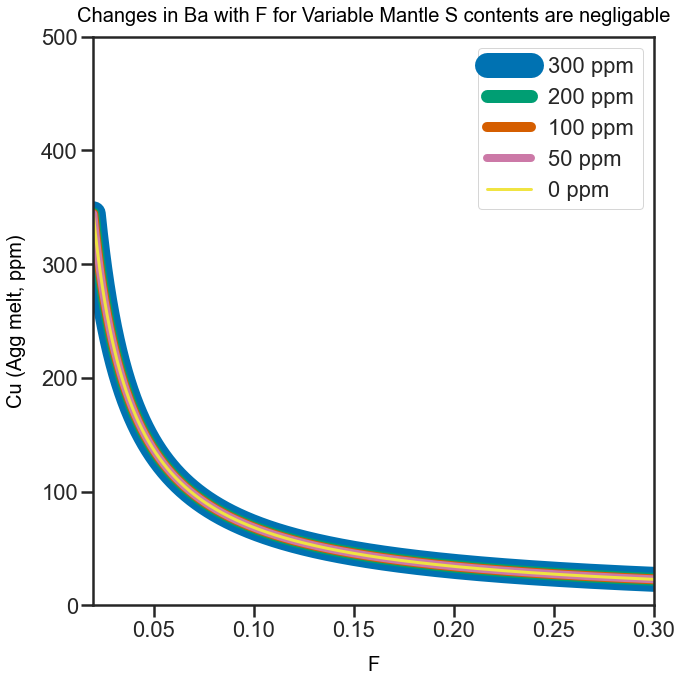

In [12]:
# This plot demonstrates that Ba concentrations are not sensitive to mantle S contents.
fig, ax = plt.subplots(figsize = (10,10))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title("Changes in Ba with F for variable Mantle S contents are negligable",
          fontdict= font, pad = 15)
plt.xlabel("F", fontdict=font, labelpad = 15)
plt.ylabel("Cu (Agg melt, ppm)", fontdict=font, labelpad = 15)
plt.plot(F, Ba_Melt_Agg[0,:], label = '300 ppm', lw = 25)
plt.plot(F, Ba_Melt_Agg[1,:], label = '200 ppm', lw = 13)
plt.plot(F, Ba_Melt_Agg[2,:], label = '100 ppm', lw = 10)
plt.plot(F, Ba_Melt_Agg[3,:], label = '50 ppm', lw = 8)
plt.plot(F, Ba_Melt_Agg[4,:], label = '0 ppm', lw = 3)
plt.xlim([0.02, 0.3])
plt.ylim([0, 500])
plt.legend()

fig.tight_layout()
fig.savefig('changes_in_Ba_w_F.png', dpi = 90)

# Plot for Cu and Ba vs. F

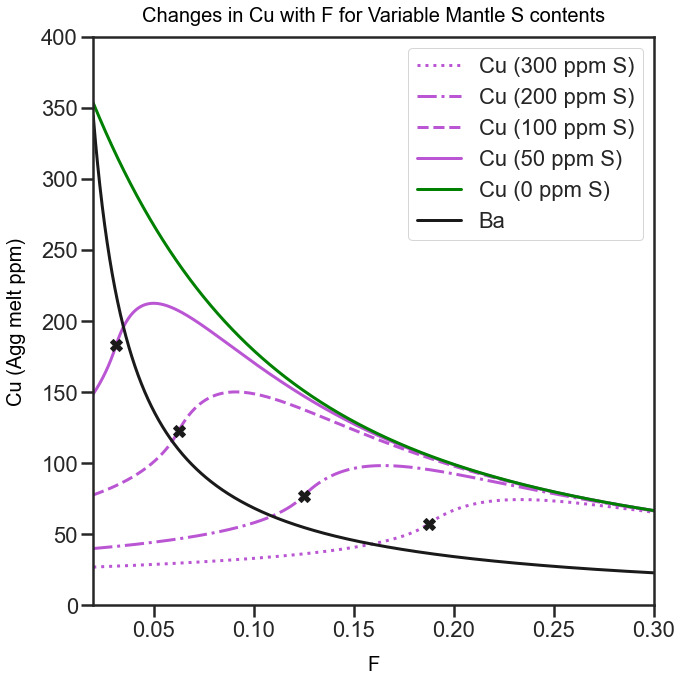

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title("Changes in Cu with F for Variable Mantle S contents",
          fontdict= font, pad = 15)
plt.xlabel("F", fontdict=font, labelpad = 15)
plt.ylabel("Cu (Agg melt ppm)", fontdict=font, labelpad = 15)
plt.plot(F, Cu_Melt_Agg[0,:], linestyle=':', color='mediumorchid', label = 'Cu (300 ppm S)') 
plt.plot(F, Cu_Melt_Agg[1,:], linestyle='-.', color='mediumorchid', label = 'Cu (200 ppm S)')
plt.plot(F, Cu_Melt_Agg[2,:], linestyle='--', color='mediumorchid', label = 'Cu (100 ppm S)')
plt.plot(F, Cu_Melt_Agg[3,:], linestyle='-', color='mediumorchid', label = 'Cu (50 ppm S)')
plt.plot(F, Cu_Melt_Agg[4,:], color='green', label = 'Cu (0 ppm S)')
plt.plot(F, Ba_Melt_Agg[3,:], color='k', label = 'Ba')
# Adding crosses for the first step with no sulfide
plt.plot(np.take(F, [SulfOut_0]), np.take(Cu_Melt_Agg[0,:], [SulfOut_0]),  marker='X', color='k') 
plt.plot(np.take(F, [SulfOut_1]), np.take(Cu_Melt_Agg[1,:], [SulfOut_1]),  marker='X', color='k') 
plt.plot(np.take(F, [SulfOut_2]), np.take(Cu_Melt_Agg[2,:], [SulfOut_2]),  marker='X', color='k') 
plt.plot(np.take(F, [SulfOut_3]), np.take(Cu_Melt_Agg[3,:], [SulfOut_3]),  marker='X', color='k') 
plt.plot(np.take(F, [SulfOut_4]), np.take(Cu_Melt_Agg[4,:], [SulfOut_4]),  marker='X', color='k') 


plt.xlim([0.02, 0.3])
plt.ylim([0, 400])
plt.legend()

fig.tight_layout()
fig.savefig('changes_in_Cu_Ba_with_F.png', dpi = 90)

# Plot of Ba vs Cu

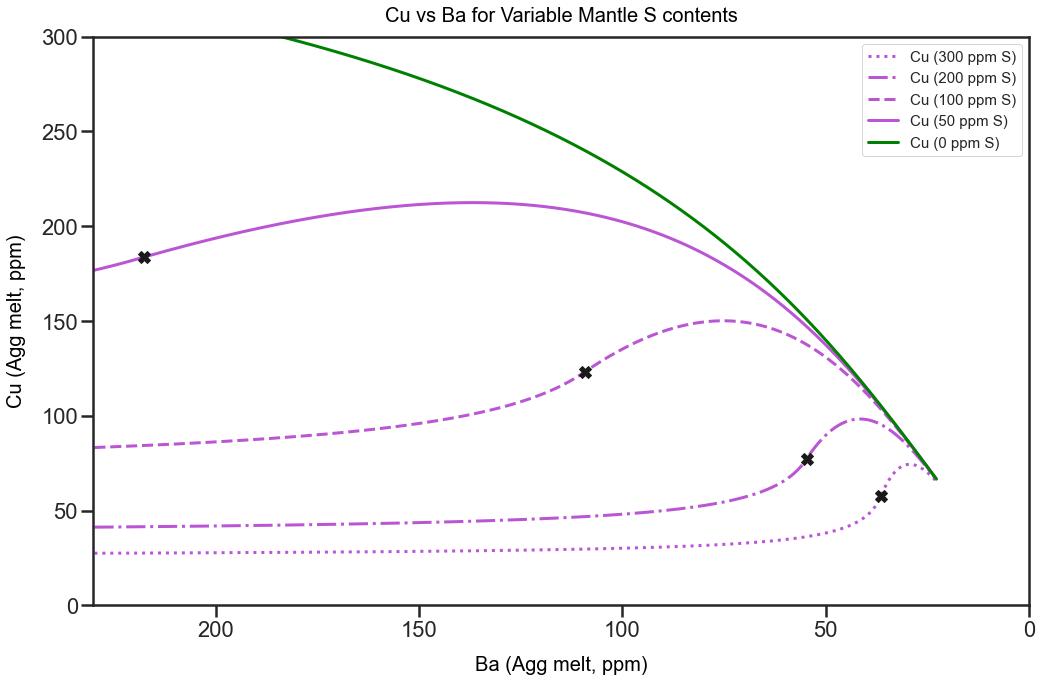

In [14]:
fig, ax = plt.subplots(figsize = (15,10))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title("Cu vs Ba for Variable Mantle S contents",
          fontdict= font, pad = 15)
plt.xlabel("Ba (Agg melt, ppm)", fontdict=font, labelpad = 15)
plt.ylabel("Cu (Agg melt, ppm)", fontdict=font, labelpad = 15)



plt.plot(Ba_Melt_Agg[0,2:], Cu_Melt_Agg[0,2:], 
         linestyle=':', color='mediumorchid', label = 'Cu (300 ppm S)') 
plt.plot(Ba_Melt_Agg[1,2:], Cu_Melt_Agg[1,2:], 
         linestyle='-.', color='mediumorchid', label = 'Cu (200 ppm S)')
plt.plot(Ba_Melt_Agg[2,2:], Cu_Melt_Agg[2,2:], 
         linestyle='--', color='mediumorchid', label = 'Cu (100 ppm S)')
plt.plot(Ba_Melt_Agg[3,2:], Cu_Melt_Agg[3,2:], 
         linestyle='-', color='mediumorchid', label = 'Cu (50 ppm S)')
plt.plot(Ba_Melt_Agg[4,2:], Cu_Melt_Agg[4,2:], 
         color='green', label = 'Cu (0 ppm S)')

plt.plot(np.take(Ba_Melt_Agg[0,2:], [SulfOut_0]), np.take(Cu_Melt_Agg[0,2:], [SulfOut_0]),  marker='X', color='k') 
plt.plot(np.take(Ba_Melt_Agg[1,2:], [SulfOut_1]), np.take(Cu_Melt_Agg[1,2:], [SulfOut_1]),  marker='X', color='k') 
plt.plot(np.take(Ba_Melt_Agg[2,2:], [SulfOut_2]), np.take(Cu_Melt_Agg[2,2:], [SulfOut_2]),  marker='X', color='k') 
plt.plot(np.take(Ba_Melt_Agg[3,2:], [SulfOut_3]), np.take(Cu_Melt_Agg[3,2:], [SulfOut_3]),  marker='X', color='k') 
plt.plot(np.take(Ba_Melt_Agg[4,2:], [SulfOut_4]), np.take(Cu_Melt_Agg[4,2:], [SulfOut_4]),  marker='X', color='k') 


plt.xlim([230, 0])
plt.ylim([0, 300])
plt.legend(fontsize = 15, frameon = True)

fig.tight_layout()
fig.savefig('Cu_Vs_Ba.png', dpi = 90)